## Tutorial 1: Academy Weaviate
### [101T Work with: Text Data]((https://docs.weaviate.io/academy/py/starter_text_data))
- How to work with any text data using Weaviate.
- How to store and index text data by meaning, using Weaviate's vectorization capabilities.
- How to search through that data using:  semantic, keyword and hybrid searches, as well as filters.
- How to use Weaviate's retrieval augmented generation (RAG) capabilities to generate outputs based on the retrieved objects

In [7]:
import weaviate
import json

In [3]:
# To confirm that the Weaviate client is installed, run the following Python code
weaviate.__version__

'4.16.10'

###  ➡️ 0. Set up Weaviate

Installation: 
```bash 
pip install -U weaviate-client
```

Weaviate Version: 
```bash 
pip show weaviate-client
```

Basic Usage: 
```bash 
import weaviate
```

###  ➡️ Create a Weaviate instance and connect to it.
We have two options to create a weaviate instance:
* Option 1: [A cloud WCD instance](https://docs.weaviate.io/academy/py/starter_text_data/setup_weaviate/create_instance/create_wcs)
* Option 2: [A local Docker instance](https://docs.weaviate.io/academy/py/starter_text_data/setup_weaviate/create_instance/create_docker)

## 👉 Selected Option: A local Docker instance
### 1. Download and run the docker-compose file
* Install [Docker](https://docs.docker.com/get-started/get-docker/) on your machine. 
* Create a new directory and navigate to it in your terminal
* Create a new file called `docker-compose.yml` and add the following content:

```bash
services:
  weaviate_anon:
    command:
    - --host
    - 0.0.0.0
    - --port
    - '8080'
    - --scheme
    - http
    image: cr.weaviate.io/semitechnologies/weaviate:1.32.9
    ports:
    - 8080:8080
    - 50051:50051
    restart: on-failure:0
    environment:
      QUERY_DEFAULTS_LIMIT: 25
      AUTHENTICATION_ANONYMOUS_ACCESS_ENABLED: 'true'
      PERSISTENCE_DATA_PATH: '/var/lib/weaviate'
      ENABLE_API_BASED_MODULES: 'true'
      BACKUP_FILESYSTEM_PATH: '/var/lib/weaviate/backups'
      CLUSTER_HOSTNAME: 'node1'
```

### 2.  Create a Weaviate instance
Run the following command to start Weaviate: `docker compose up`

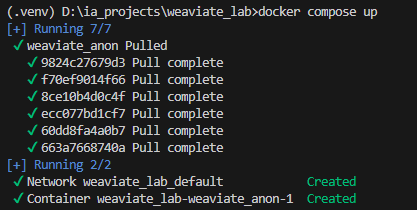

### 2.1 Weaviate instance details
Once the instance is created, you can access it at http://localhost:8080

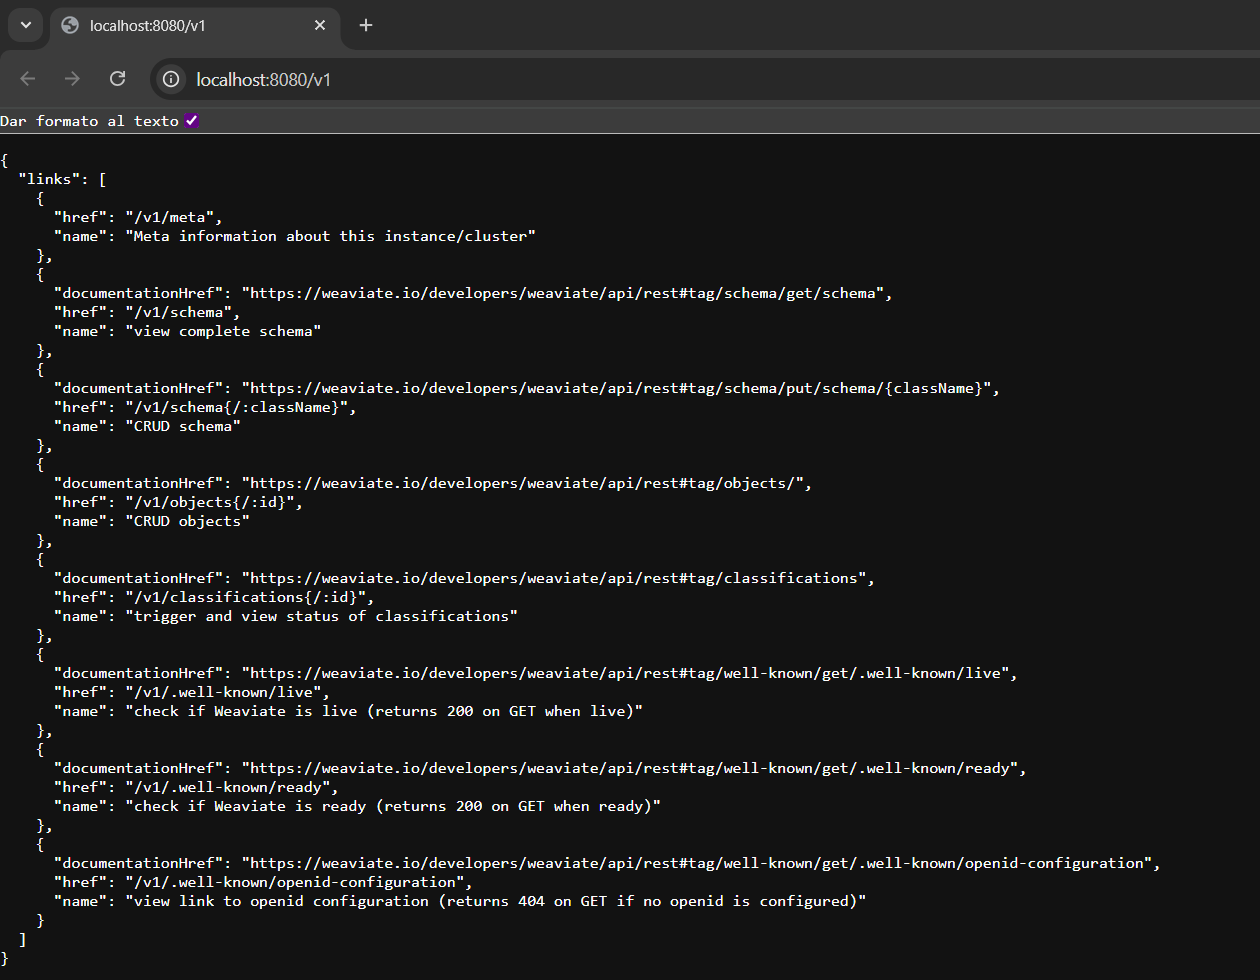

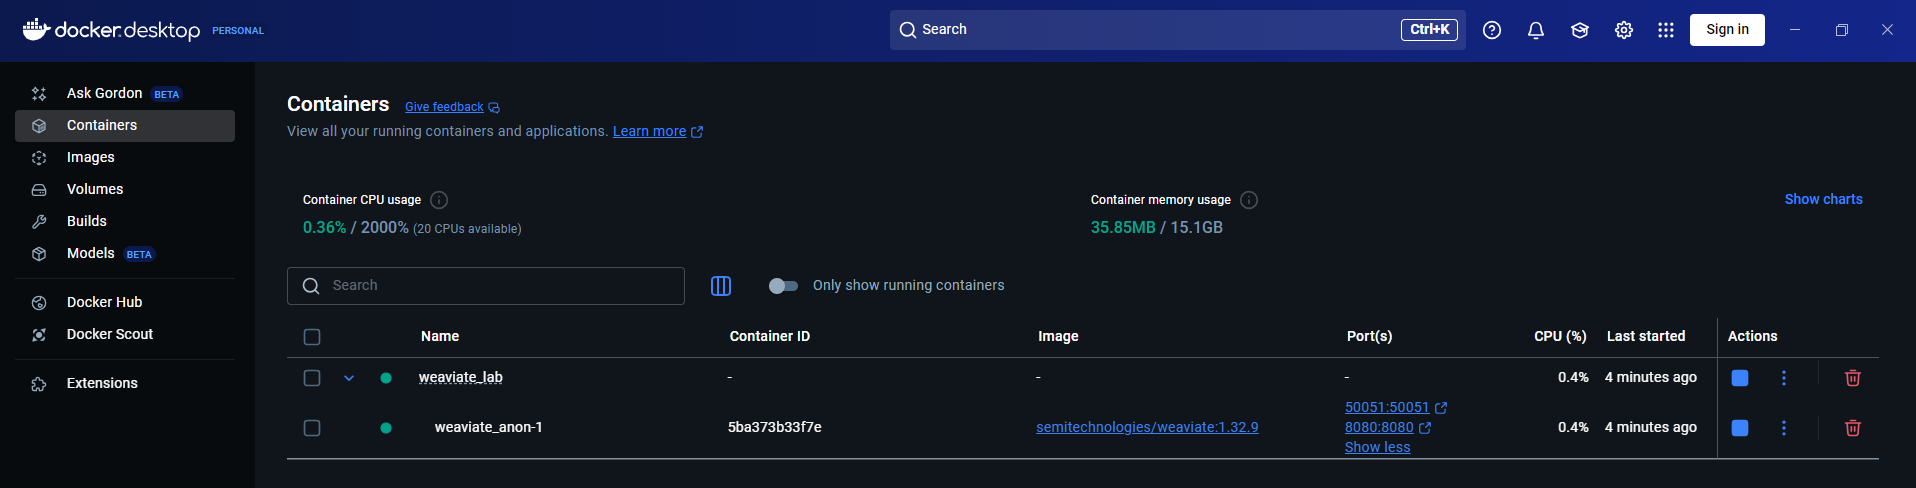

### 3. Connect to your Weaviate instance
To connect to the Weaviate instance, use the `connect_to_local` function.

In [4]:
client = weaviate.connect_to_local()

### 3.1 Provide inference API keys
Some Weaviate modules can use inference APIs for vectorizing data or large language model integration. You can provide the API keys for these services to Weaviate at instantiation. 

For example: you can provide the OpenAI API key to Weaviate through headers={"X-OpenAI-Api-Key": <YOUR_KEY>} 

```bash
import weaviate
import os

headers = {
    "X-OpenAI-Api-Key": os.getenv("OPENAI_APIKEY")}  # Replace with your OpenAI API key

client = weaviate.connect_to_local(headers=headers)
```


### 4. Communicate with Weaviate
Basic operations to communicate with Weaviate using the Python client library.

### ➡️ Check Weaviate status

In [6]:
assert client.is_live() # This will raise an exception if the client is not live

### ➡️ Retrieve server meta information

In [8]:
metainfo = client.get_meta()
print(json.dumps(metainfo, indent=2))  # Print the meta information in a readable format

{
  "grpcMaxMessageSize": 104858000,
  "hostname": "http://[::]:8080",
  "modules": {
    "generative-anthropic": {
      "documentationHref": "https://docs.anthropic.com/en/api/getting-started",
      "name": "Generative Search - Anthropic"
    },
    "generative-anyscale": {
      "documentationHref": "https://docs.anyscale.com/endpoints/overview",
      "name": "Generative Search - Anyscale"
    },
    "generative-aws": {
      "documentationHref": "https://docs.aws.amazon.com/bedrock/latest/APIReference/welcome.html",
      "name": "Generative Search - AWS"
    },
    "generative-cohere": {
      "documentationHref": "https://docs.cohere.com/reference/chat",
      "name": "Generative Search - Cohere"
    },
    "generative-databricks": {
      "documentationHref": "https://docs.databricks.com/en/machine-learning/foundation-models/api-reference.html#completion-task",
      "name": "Generative Search - Databricks"
    },
    "generative-friendliai": {
      "documentationHref": "http

### ➡️ Close the connection
After you have finished using the Weaviate client, you should close the connection. This frees up resources and ensures that the connection is properly closed.

We suggest using a `try-finally` block as a best practice.

```bash
# Instantiate your client (not shown). e.g.:
# client = weaviate.connect_to_weaviate_cloud(...) or
# client = weaviate.connect_to_local(...)

try:
    # Work with the client here - e.g.:
    assert client.is_live()
    pass

finally:  # This will always be executed, even if an exception is raised
    client.close()  # Close the connection & release resources

```